In [32]:
%matplotlib inline

In [130]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib
matplotlib.style.use('ggplot')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [27]:
papers_2012 = pd.read_csv('papers_2012.csv', parse_dates=True)
papers_2013 = pd.read_csv('papers_2013.csv', parse_dates=True)
papers_2014 = pd.read_csv('papers_2014.csv', parse_dates=True)
papers_2015 = pd.read_csv('papers_2015.csv', parse_dates=True)
papers_2016 = pd.read_csv('papers_2016.csv', parse_dates=True)
frames = [papers_2012, papers_2013, papers_2014, papers_2015, papers_2016]
df = pd.concat(frames)
df['created'] = pd.to_datetime(df['created'], format = "%Y-%m-%d")

In [14]:
df.describe()

,Unnamed: 0
count,88618.000000
mean,9799.798246
std,6548.991900
min,0.000000
25%,4430.250000
50%,8861.000000
75%,14068.750000
max,26067.000000


In [65]:
per_year_df = df.groupby(df.created.map(lambda x: x.year)).id.count()
per_year_df.columns = ['count']

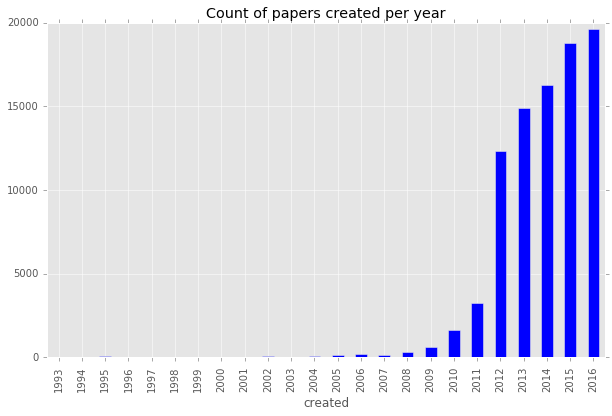

In [115]:
per_year_df.plot(kind='bar', figsize=(10, 6)).set_title('Count of papers created per year')

In [105]:
per_category = Counter()
for index, row in df.iterrows():
    categories = row['categories'].replace('[', '').replace(']', '').split(',')
    for c in categories:
        per_category[c.strip()] += 1

In [106]:
per_category_df = pd.DataFrame.from_dict(per_category, orient='index')
per_category_df.columns = ['count']

In [107]:
sorted_categories_df = per_category_df.sort(['count'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [108]:
sorted_categories_df.describe()

,count
count,152.000000
mean,1119.394737
std,2312.446550
min,1.000000
25%,33.750000
50%,152.000000
75%,886.000000
max,14414.000000


In [109]:
sorted_categories_df[:10]

,count
math.IT,14414
cs.IT,14414
cs.LG,10155
cs.CV,8055
cs.AI,6934
cs.DS,6456
stat.ML,5838
cs.SI,5761
cs.NI,5602
cs.LO,4607


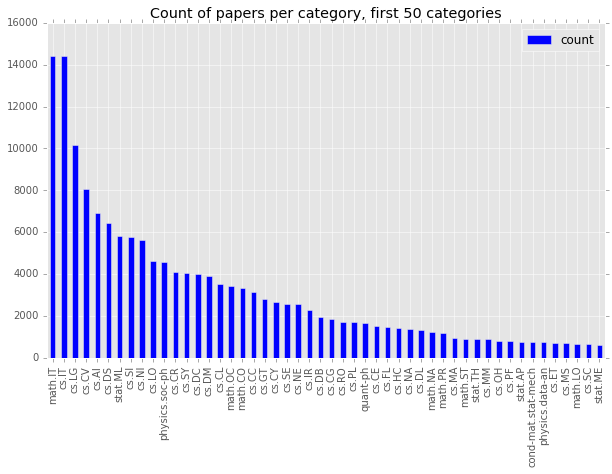

In [114]:
sorted_categories_df[:50].plot(kind='bar', figsize=(10, 6)).set_title('Count of papers per category, first 50 categories')
#Computer science categories
# cs.AR	Computer Science - Architecture
# cs.AI	Computer Science - Artificial Intelligence
# cs.CL	Computer Science - Computation and Language
# cs.CC	Computer Science - Computational Complexity
# cs.CE	Computer Science - Computational Engineering; Finance; and Science
# cs.CG	Computer Science - Computational Geometry
# cs.GT	Computer Science - Computer Science and Game Theory
# cs.CV	Computer Science - Computer Vision and Pattern Recognition
# cs.CY	Computer Science - Computers and Society
# cs.CR	Computer Science - Cryptography and Security
# cs.DS	Computer Science - Data Structures and Algorithms
# cs.DB	Computer Science - Databases
# cs.DL	Computer Science - Digital Libraries
# cs.DM	Computer Science - Discrete Mathematics
# cs.DC	Computer Science - Distributed; Parallel; and Cluster Computing
# cs.GL	Computer Science - General Literature
# cs.GR	Computer Science - Graphics
# cs.HC	Computer Science - Human-Computer Interaction
# cs.IR	Computer Science - Information Retrieval
# cs.IT	Computer Science - Information Theory
# cs.LG	Computer Science - Learning
# cs.LO	Computer Science - Logic in Computer Science
# cs.MS	Computer Science - Mathematical Software
# cs.MA	Computer Science - Multiagent Systems
# cs.MM	Computer Science - Multimedia
# cs.NI	Computer Science - Networking and Internet Architecture
# cs.NE	Computer Science - Neural and Evolutionary Computing
# cs.NA	Computer Science - Numerical Analysis
# cs.OS	Computer Science - Operating Systems
# cs.OH	Computer Science - Other
# cs.PF	Computer Science - Performance
# cs.PL	Computer Science - Programming Languages
# cs.RO	Computer Science - Robotics
# cs.SE	Computer Science - Software Engineering
# cs.SD	Computer Science - Sound
# cs.SC	Computer Science - Symbolic Computation

In [134]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
stops = [word for word in stopwords.words('english')]
stops += ["=", "->", ".", ","]

word_counter = Counter()
for index, row in df.iterrows():
    tokens = tokenizer.tokenize(row['abstract'])
    for t in tokens:
        token = t.lower()
        if token not in stops:
            word_counter[token] += 1

word_counter.most_common(n=10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


[('paper', 46631),
 ('data', 46366),
 ('problem', 43331),
 ('algorithm', 41784),
 ('model', 38584),
 ('show', 36403),
 ('results', 33620),
 ('network', 33001),
 ('using', 32721),
 ('based', 31783)]

In [135]:
words_df = pd.DataFrame.from_dict(word_counter, orient='index')
words_df.columns = ['count']

In [136]:
first_words_df = words_df.sort_values(by=['count'], ascending=False)[:50]

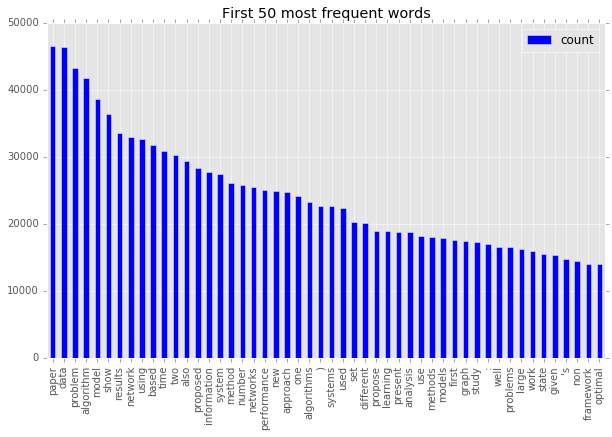

In [137]:
first_words_df.plot(kind='bar', figsize=(10, 6)).set_title("First 50 most frequent words")